## Prediction using Decision Tree Algorithm

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [11]:
dir(load_iris())

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
iris = load_iris()

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df['target'] = iris.target
df['species'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data visualization

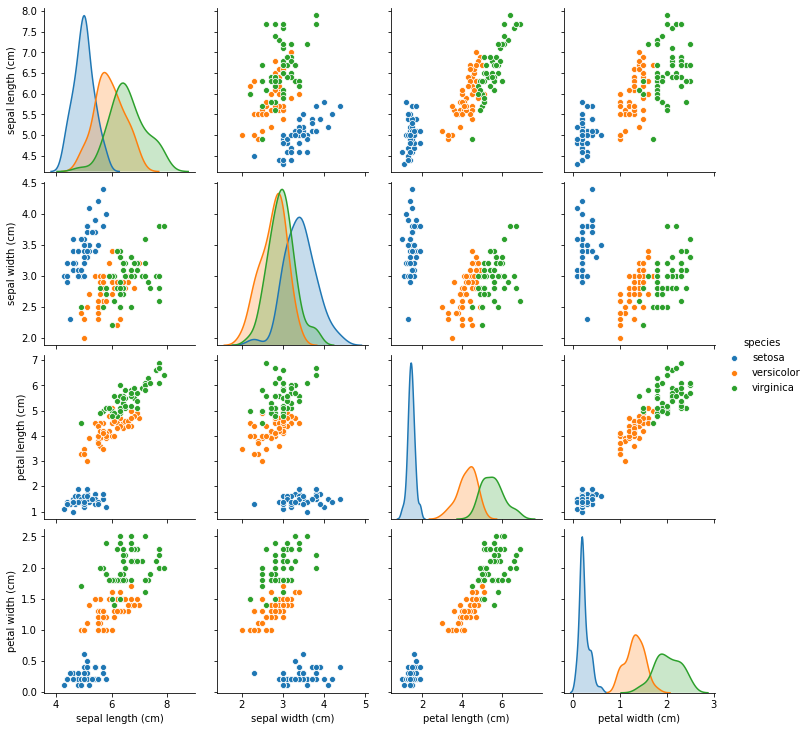

In [22]:
#Pair plot
sns.pairplot(df,hue='species',vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

This pairplot shows the distribution of single variables as well as relationship between two variables.

In [ ]:
df = df.drop('species', axis = 'columns')

<AxesSubplot:>

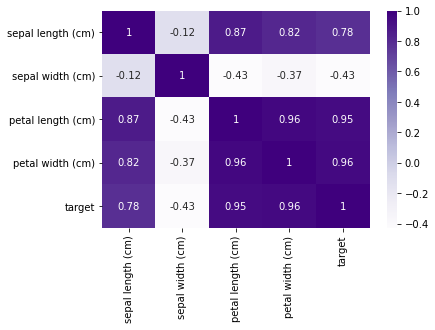

In [32]:
#Plotting correlation using heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='Purples')

This heatmap shows pearson correlation between features. It can be observed that petal length and petal width are highly correlated with out target.

### Prearing data for model

In [34]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Model training

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
dtc.score(X_test, y_test)

0.9

### Visualization of Decision Tree Classifier

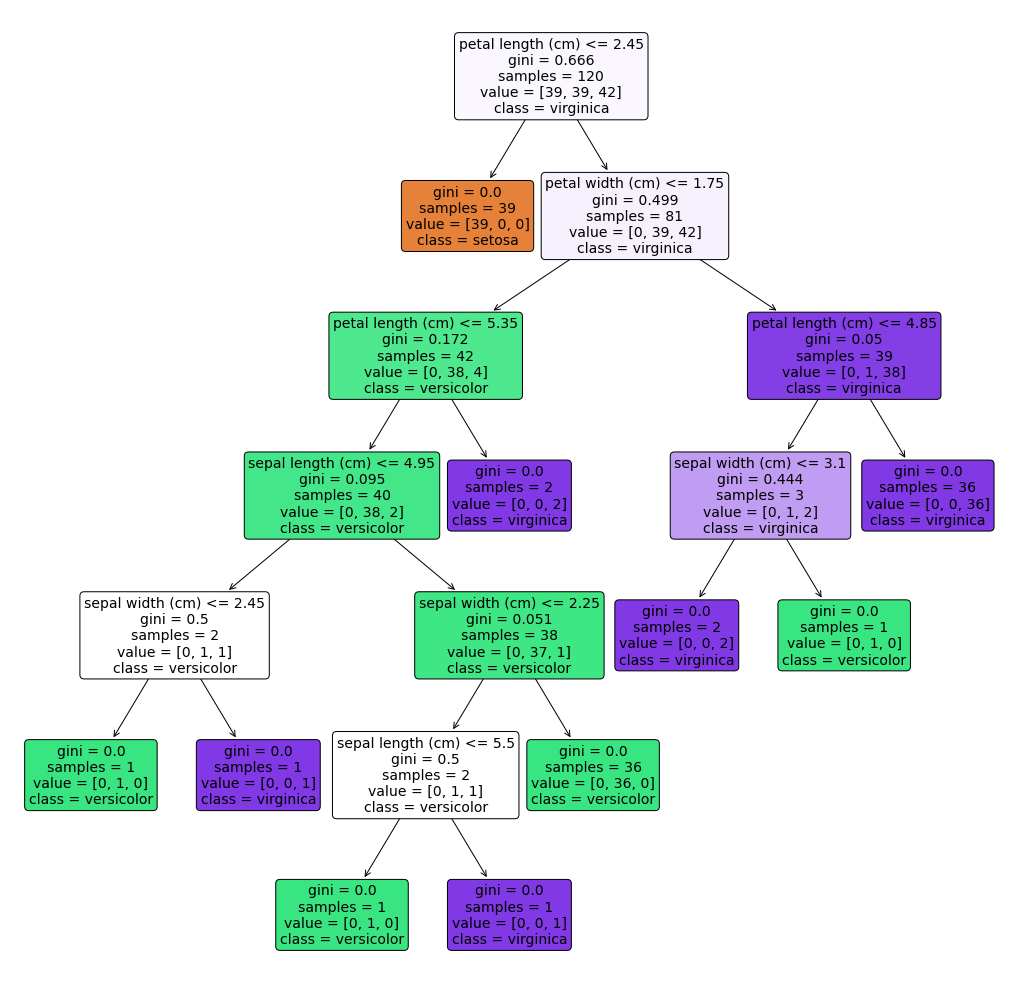

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,18))
a = plot_tree(dtc, 
              feature_names=iris.feature_names, 
              class_names=iris.target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)